# Intersections

In [1]:
import geopandas
import starepandas
import matplotlib.pyplot as plt

In [5]:
fname = 'zip://../tests/data/amapoly_ivb.zip'
amazon = geopandas.read_file(fname) # Nice flex
amazon = amazon.to_crs('EPSG:4326')
amazon['geom_simple'] = amazon.simplify(0.02)
amazon.set_geometry('geom_simple', inplace=True)

amazon = starepandas.STAREDataFrame(amazon)
sids = amazon.make_sids(resolution=8, force_ccw=True)
amazon.set_sids(sids, inplace=True)

trixels = amazon.make_trixels()
amazon.set_trixels(trixels, inplace=True)

In [8]:
countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
countries = countries.sort_values(by='name')
samerica = countries[countries.continent=='South America']

samerica = starepandas.STAREDataFrame(samerica)
sids = samerica.make_sids(resolution=8)
samerica.set_sids(sids, inplace=True)

trixels = samerica.make_trixels()
samerica.set_trixels(trixels, inplace=True)

In [18]:
stare_amazon = samerica.stare_intersection(amazon.iloc[0].sids)
samerica['stare_amazon'] = stare_amazon
samerica['trixel_amazon'] = samerica.set_sids('stare_amazon').make_trixels()

IOStream.flush timed out


TypeError: STAREDataFrame.make_trixels() got an unexpected keyword argument 'sids_column'

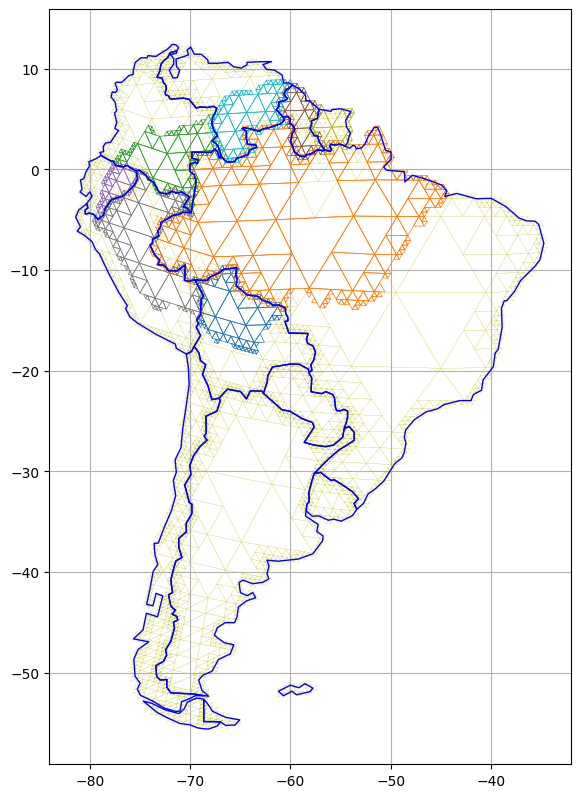

In [37]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
ax.grid(True)

samerica.plot(ax=ax, trixels=True, color='y', lw=0.1, zorder=0)
samerica.plot(ax=ax, trixels=False, facecolor='none', edgecolor='blue', lw=1, zorder=4)
df = samerica.set_geometry('trixel_amazon')
df = df[df.geometry.is_empty==False]
df = df.set_geometry(df.geometry.boundary)
df.plot(trixels=False, ax=ax, zorder=3, column='name', lw=0.5)

plt.savefig('intersection.png')

In [13]:
df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,sids,trixels,stare_amazon,trixel_amazon
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...","[1831883128898060296, 1831900721084104712, 183...","MULTIPOLYGON (((-67.97225 -54.54315, -68.63643...",[],"MULTILINESTRING ((-67.97225 -54.54315, -68.636..."
30,11138234,South America,Bolivia,BOL,78350.0,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0...","[2684145377912815620, 2692026677260713989, 270...","MULTIPOLYGON (((-62.76428 -18.88667, -66.06621...","[2684180562284904455, 2684233338843037704, 268...","MULTILINESTRING ((-62.76428 -18.88667, -66.066..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...","[2749447572509687812, 2796735368597078020, 286...","MULTIPOLYGON (((-53.69934 -4.63080, -61.44765 ...","[2670634579030704135, 2670669763402792968, 267...","MULTILINESTRING ((-53.69934 -4.63080, -61.4476..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...","[1829024398665842695, 1831839148432949255, 183...","MULTIPOLYGON (((-70.49911 -54.87622, -70.32849...",[],"MULTILINESTRING ((-70.49911 -54.87622, -70.328..."
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...","[2666130979403333637, 2667256879310176261, 266...","MULTIPOLYGON (((-75.36119 8.42106, -76.79015 5...","[2667256879310176262, 2667432801170620423, 266...","MULTILINESTRING ((-75.36119 8.42106, -76.79015..."
44,16290913,South America,Ecuador,ECU,182400.0,"POLYGON ((-75.37322 -0.15203, -75.23372 -0.911...","[2668523516705374214, 2669086466658795526, 267...","MULTIPOLYGON (((-78.07509 -2.31151, -78.84541 ...","[2668523516705374215, 2668576293263507464, 266...","MULTILINESTRING ((-78.07509 -2.31151, -78.8454..."
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...","[1807491562947477511, 1807104534854500360, 180...","MULTIPOLYGON (((-58.42519 -51.94763, -58.46770...",[],"MULTILINESTRING ((-58.42519 -51.94763, -58.467..."
41,737718,South America,Guyana,GUY,6093.0,"POLYGON ((-56.53939 1.89952, -56.78270 1.86371...","[2767743445995880454, 2759299196694560775, 276...","MULTIPOLYGON (((-58.56295 5.89722, -59.38264 7...","[2758489956136517640, 2758507548322562056, 275...","MULTILINESTRING ((-58.56295 5.89722, -59.38264..."
156,6943739,South America,Paraguay,PRY,64670.0,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...","[2639390856615821318, 2792372506458062854, 279...","MULTIPOLYGON (((-61.01690 -22.26119, -61.90025...",[],"MULTILINESTRING ((-61.01690 -22.26119, -61.900..."
31,31036656,South America,Peru,PER,410400.0,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...","[2693152577167556612, 2699907976608612356, 268...","MULTIPOLYGON (((-74.96857 -15.27649, -72.04021...","[2668945729170440198, 2669262388519239688, 266...","MULTILINESTRING ((-74.96857 -15.27649, -72.040..."
